In [6]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read data

In [21]:
data_dir = './data/'

In [212]:
dfs = []
trade_phases={
    'austria-2005-2007.xml': 'p1',
    'austria-2008-2012.xml': 'p2',
    'austria-2013-2020.xml': 'p3',
    'austria-2021-2030.xml': 'p4'
}


for file in os.listdir(data_dir):
    if 'austria' in file:
        df = pd.read_xml(os.path.join(data_dir, file))
        phase = trade_phases[file]
        df.columns = [f'{c}_{phase}' if c != 'InstallationName' else c for c in df.columns]
        dfs.append(df)

In [213]:
df = dfs[0]
for i in range(1, len(dfs)):
    df = df.merge(dfs[i], how='outer', on=['InstallationName'])

In [214]:
df = df.sort_index(axis=1)

In [215]:
def combine_names(row, columns_to_combine):
    for col in columns_to_combine:
        if not pd.isna(row[col]):
            return row[col]
    return np.nan

In [216]:
combine_names_dict = {
    'AccountHolderName': ['AccountHolderName_p1', 'AccountHolderName_p2', 'AccountHolderName_p3', 'AccountHolderName_p4'],
    'AccountStatus': ['AccountStatus_p1', 'AccountStatus_p2', 'AccountStatus_p3', 'AccountStatus_p4'],
    'AddressCity': ['AddressCity_p1', 'AddressCity_p2', 'AddressCity_p3', 'AddressCity_p4'],
    'InstallationID': ['InstallationID_p1', 'InstallationID_p2', 'InstallationID_p3', 'InstallationID_p4'],
    'PermitOrPlanID': ['PermitOrPlanID_p1', 'PermitOrPlanID_p2', 'PermitOrPlanID_p3', 'PermitOrPlanID_p4'],
    'Status': ['Status_p1', 'Status_p2', 'Status_p3', 'Status_p4']
}
for col_name, cols_to_combine in combine_names_dict.items():
    df[col_name] = df.apply(combine_names, axis=1, columns_to_combine=cols_to_combine)
    df = df.drop(columns=cols_to_combine)

### Analysis

In [217]:
allocation_phase_cols = {}
for i in range(1, 5):
    allocation_phase_cols[f'p{i}'] = [c for c in df.columns if 'allocation' in c and f'p{i}' in c]
    

In [218]:
for phase, phase_cols in allocation_phase_cols.items():
    df[f'allocation_total_{phase}'] = df[phase_cols].sum(axis=1)
    df[f'allocation_mean_{phase}'] = df[phase_cols].mean(axis=1)
    df[f'allocation_max_{phase}'] = df[phase_cols].max(axis=1)

c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

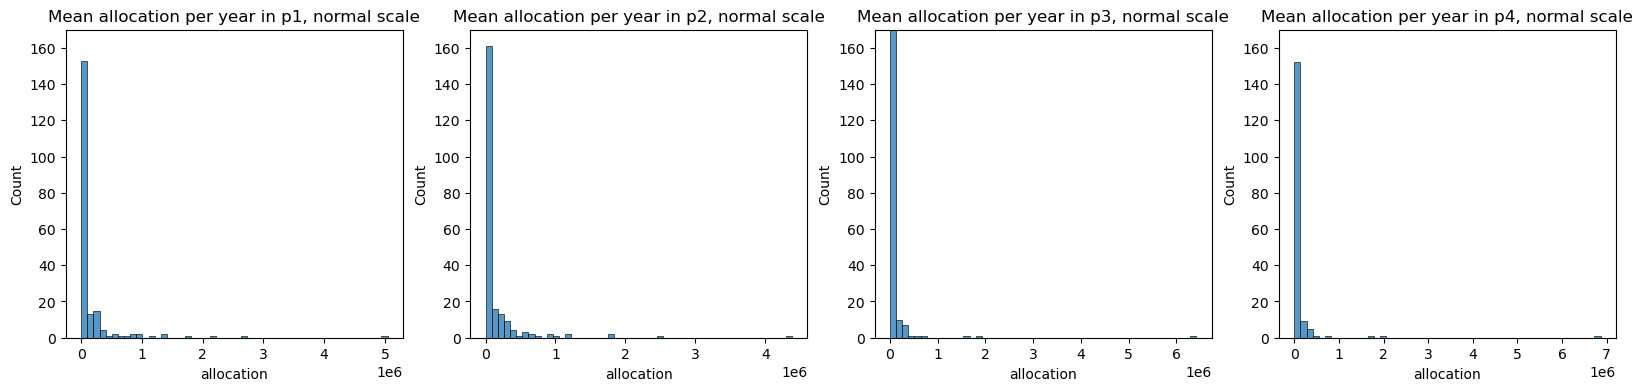

In [219]:
_, axes = plt.subplots(1, 4,  figsize=(20, 4))
axes = axes.flatten()
for i, phase in enumerate(allocation_phase_cols.keys()):
    sns.histplot(data=df, x=f'allocation_mean_{phase}', ax=axes[i], bins=50)
    axes[i].set(title=f'Mean allocation per year in {phase}, normal scale', xlabel='allocation')
    axes[i].set_ylim(0, 170)

c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

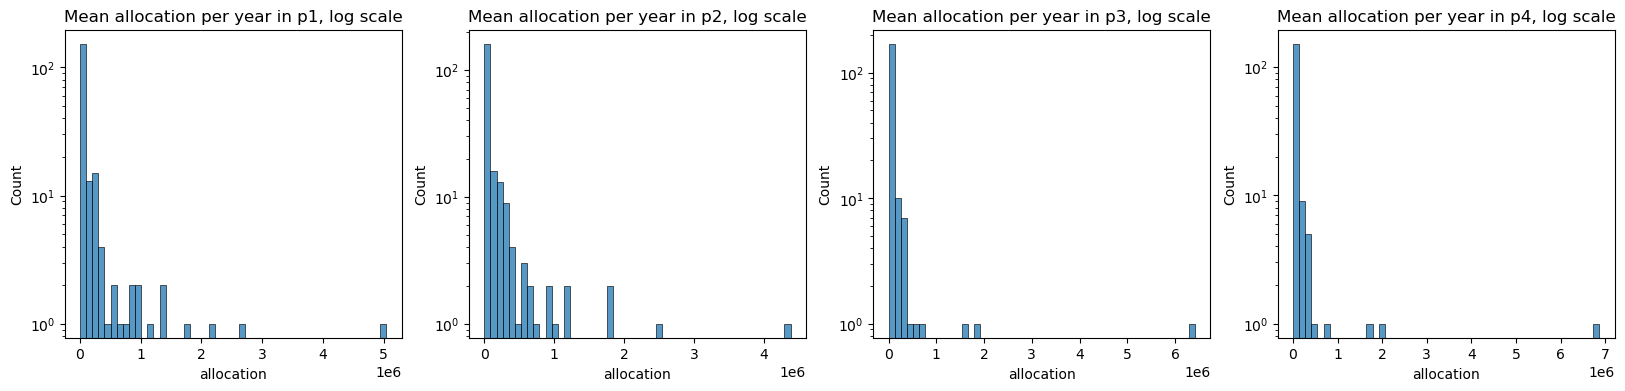

In [220]:
_, axes = plt.subplots(1, 4, figsize=(20, 4))
axes = axes.flatten()
for i, phase in enumerate(allocation_phase_cols.keys()):
    sns.histplot(data=df, x=f'allocation_mean_{phase}', ax=axes[i], bins=50)
    axes[i].set(title=f'Mean allocation per year in {phase}, log scale', xlabel='allocation')
    axes[i].set_yscale('log')

In [273]:
allocation_over_years = df.apply(lambda row: row[[c for c in df.columns if 'allocation2' in c]].values, axis=1).tolist()

In [274]:
allocation_cols = [c for c in df.columns if 'allocation2' in c]

c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

[[Text(-2.5, 0, '2005'),
  Text(0.0, 0, '2006'),
  Text(2.5, 0, '2007'),
  Text(5.0, 0, '2008'),
  Text(7.5, 0, '2009'),
  Text(10.0, 0, '2010'),
  Text(12.5, 0, '2011'),
  Text(15.0, 0, '2012'),
  Text(17.5, 0, '2013'),
  Text(20.0, 0, '2014'),
  Text(22.5, 0, '2015')]]

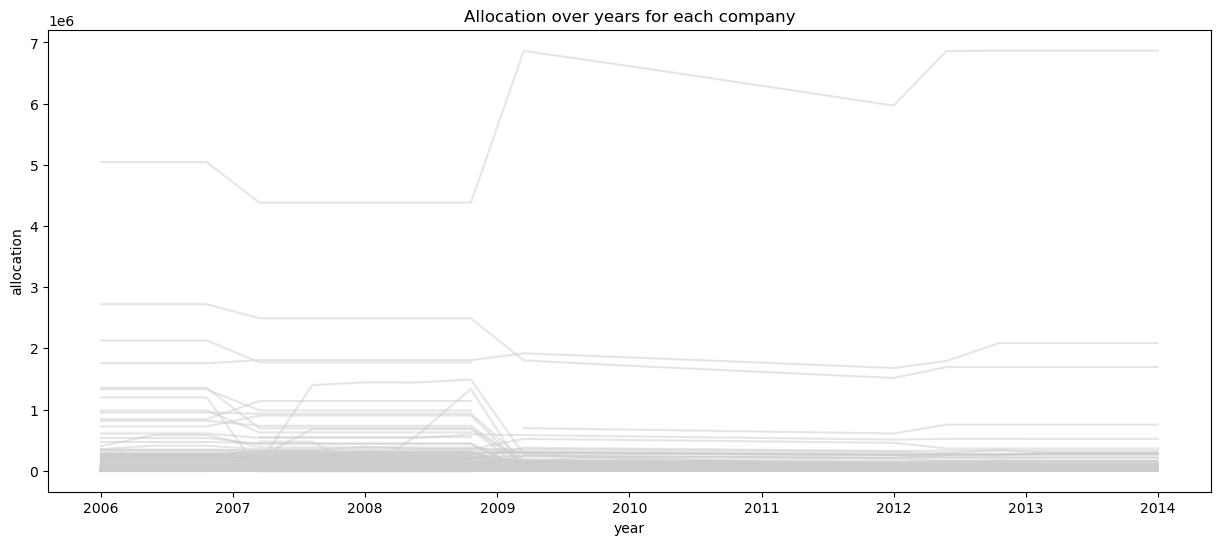

In [275]:
_, ax = plt.subplots(1, 1, figsize=(15, 6))
for company_allocation in allocation_over_years:
    sns.lineplot(y=company_allocation, x=range(len(company_allocation)), c='#cccccc', alpha=0.5, zorder=0)
ax.set(title='Allocation over years for each company', xlabel='year', ylabel='allocation')
ax.set(xticklabels=range(2005, 2026))

In [268]:
allocation_cols = [c for c in df.columns if 'allocation2' in c]
allocation_over_years = df[df[allocation_cols].max(axis=1) < 100000].apply(lambda row: row[[c for c in df.columns if 'allocation2' in c]].values, axis=1).tolist()

In [277]:
df

,InstallationName,LatestUpdate_p1,LatestUpdate_p2,LatestUpdate_p3,LatestUpdate_p4,allocation2005_p1,allocation2006_p1,allocation2007_p1,allocation2008_p2,allocation2009_p2,...,allocation_max_p1,allocation_total_p2,allocation_mean_p2,allocation_max_p2,allocation_total_p3,allocation_mean_p3,allocation_max_p3,allocation_total_p4,allocation_mean_p4,allocation_max_p4
0,Calmit Bad Ischl,2009-05-08 09:13:58,2009-05-08 09:13:58,2013-12-19 15:47:52,2021-07-26 15:40:18,44894.0,44894.0,44894.0,43171.0,43171.0,...,44894.0,215855.0,43171.0,43171.0,316312.0,39539.000,42159.0,166080.0,33216.0,33216.0
1,Breitenfelder Edelstahl Mitterdorf,2009-05-08 09:13:58,2011-02-28 10:33:50,2013-12-19 15:48:16,2023-09-12 12:11:53,8492.0,8492.0,8492.0,14063.0,17155.0,...,8492.0,110505.0,22101.0,26429.0,113433.0,14179.125,15118.0,77203.0,15440.6,16007.0
2,Ziegelwerk Danreiter Ried im Innkreis,2009-05-08 09:13:58,2009-05-08 09:13:58,2013-12-19 15:48:12,2023-09-12 12:11:54,7397.0,7397.0,7397.0,5927.0,5927.0,...,7397.0,29635.0,5927.0,5927.0,26221.0,3277.625,3494.0,22085.0,4417.0,4572.0
3,Wienerberger Blindenmarkt,2009-05-08 09:13:58,NaN,NaN,NaN,8335.0,8335.0,8335.0,NaN,NaN,...,8335.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
4,FunderMax Wr. Neudorf,2009-05-08 09:13:58,2009-05-08 09:13:58,2013-12-19 15:47:46,2022-09-23 10:06:00,24003.0,24003.0,24003.0,27343.0,27343.0,...,24003.0,136715.0,27343.0,27343.0,194905.0,24363.125,26223.0,128152.0,25630.4,25877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Vertellus Specialties Austria,NaN,NaN,2017-01-23 14:36:10,2021-07-26 15:40:46,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,274398.0,54879.600,70682.0,290180.0,58036.0,58036.0
258,Boehringer Ingelheim Wien,NaN,NaN,2021-12-22 11:50:06,2023-04-11 12:12:37,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,0.000,0.0,16171.0,3234.2,3383.0
259,Wien Energie - FHKW Arsenal 2,NaN,NaN,NaN,2023-09-12 12:11:54,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,9188.0,1837.6,2707.0
260,TIWAG - Notfallheizwerk Lienz III,NaN,NaN,NaN,2021-07-26 15:40:46,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,130.0,26.0,26.0


c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

[[Text(-2.5, 0, '2005'),
  Text(0.0, 0, '2006'),
  Text(2.5, 0, '2007'),
  Text(5.0, 0, '2008'),
  Text(7.5, 0, '2009'),
  Text(10.0, 0, '2010'),
  Text(12.5, 0, '2011'),
  Text(15.0, 0, '2012'),
  Text(17.5, 0, '2013'),
  Text(20.0, 0, '2014'),
  Text(22.5, 0, '2015')]]

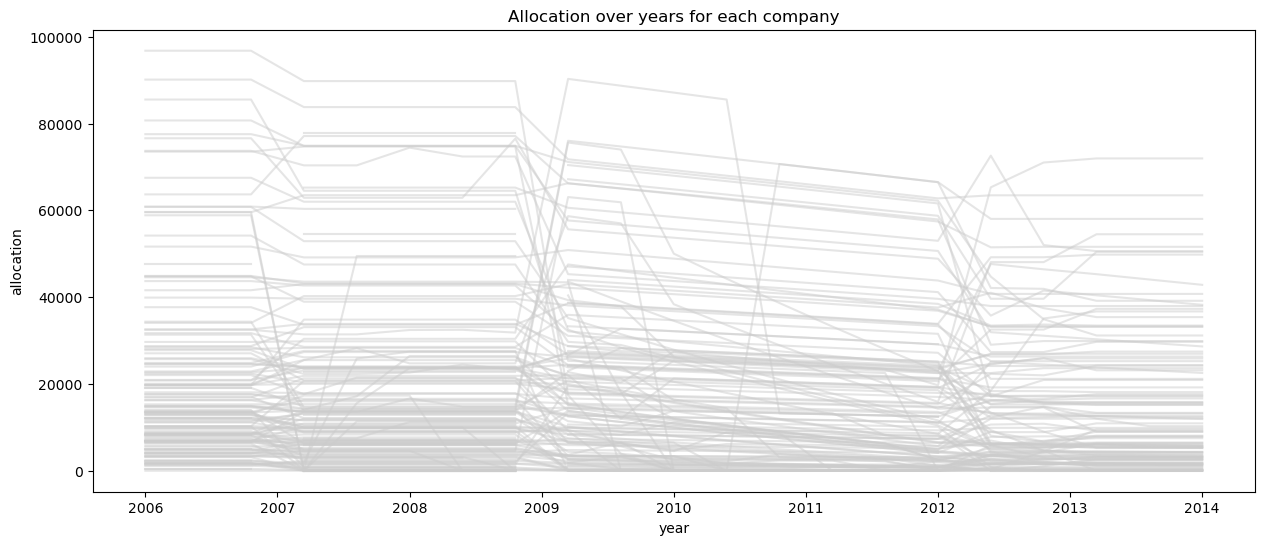

In [269]:

_, ax = plt.subplots(1, 1, figsize=(15, 6))
for company_allocation in allocation_over_years:
    sns.lineplot(y=company_allocation, x=range(len(company_allocation)), c='#cccccc', alpha=0.5, zorder=0)
ax.set(title='Allocation over years for each company', xlabel='year', ylabel='allocation')
ax.set(xticklabels=range(2005, 2026))

### Excel data

In [7]:
df_free_allowances = pd.read_excel('./data/data_2008-2022.xlsx', header=21)
df_free_allowances = df_free_allowances[df_free_allowances.REGISTRY_CODE == 'AT']
df_free_allowances.columns = [c if 'ALLOCATION_' in c else c.replace('ALLOCATION', 'ALLOCATION_') for c in df_free_allowances.columns]

In [8]:
years = range(2008, 2023)

In [9]:
allowance_cols = [c for c in df_free_allowances.columns if 'VERIFIED_EMISSIONS_2' in c or 'ALLOCATION_2' in c]

In [10]:
df_free_allowances = df_free_allowances.replace('Excluded', np.nan)
df_free_allowances[allowance_cols] = df_free_allowances[allowance_cols].astype(float)

In [57]:
for year in years:
    df_free_allowances[f'ALLOCATION_DIFF_{year}'] = df_free_allowances[f'VERIFIED_EMISSIONS_{year}'] - df_free_allowances[f'ALLOCATION_{year}']
    df_free_allowances[f'ALLOCATION_DIFF_NORM_{year}'] = df_free_allowances[f'ALLOCATION_DIFF_{year}'] / df_free_allowances[f'VERIFIED_EMISSIONS_{year}']

In [58]:
allowance_diff_cols = [c for c in df_free_allowances.columns if 'ALLOCATION_DIFF_' in c]

id_cols = ['REGISTRY_CODE', 'IDENTIFIER_IN_REG', 'INSTALLATION_NAME',
       'INSTALLATION_IDENTIFIER', 'PERMIT_IDENTIFIER',
       'MAIN_ACTIVITY_TYPE_CODE']

stubnames = ['ALLOCATION_', 'ALLOCATION_RESERVE_', 'ALLOCATION_TRANSITIONAL_', 'ALLOCATION_DIFF_', 'CH_ALLOCATION_',
             'VERIFIED_EMISSIONS_', 'CH_VERIFIED_EMISSIONS_', 'ALLOCATION_DIFF_NORM_']

In [59]:
df_free_allowances_melted = pd.wide_to_long(df_free_allowances, stubnames=stubnames, i=id_cols, j='year')
df_free_allowances_melted = df_free_allowances_melted.reset_index(drop=False)

Text(0.5, 1.0, 'Difference in (emissions - allocated allowances) over years')

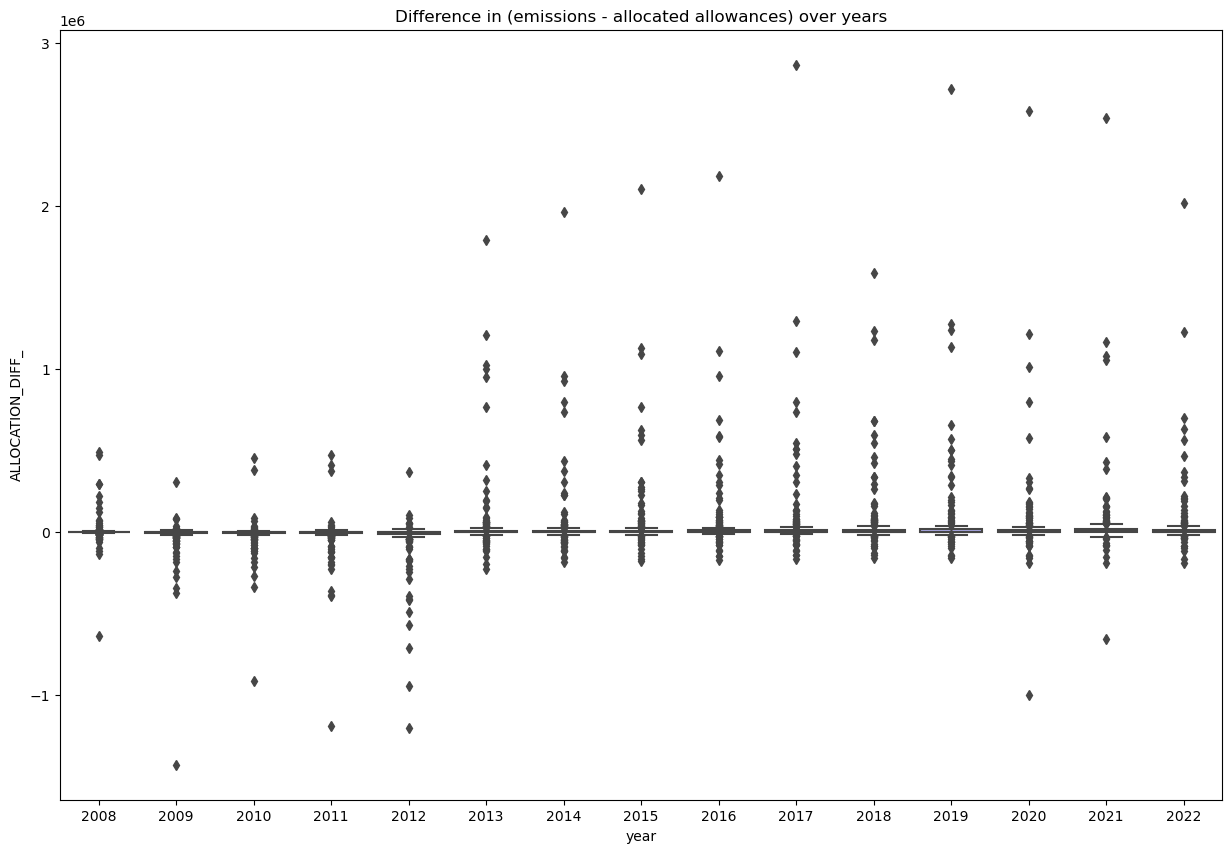

In [15]:
_, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df_free_allowances_melted, x='year', y='ALLOCATION_DIFF_', ax=ax)
ax.set_title('Difference in (emissions - allocated allowances) over years')

In [30]:
import plotly.express as px
fig = px.box(df_free_allowances_melted, y="ALLOCATION_DIFF_", x='year', hover_data=['INSTALLATION_NAME'], title='Difference in (emissions - allocated allowances) over years')
# add vertical line between year 2012 and 2013 labeled 'phase switch'
fig.add_vline(x=2012.5, line_width=3, line_dash="dash", line_color="green", annotation_text="phase switch", annotation_position="top left")
fig.add_vline(x=2020.5, line_width=3, line_dash="dash", line_color="green", annotation_text="phase switch", annotation_position="top left")
fig.show()

In [60]:
import plotly.express as px
fig = px.box(df_free_allowances_melted, y="ALLOCATION_DIFF_NORM_", x='year', hover_data=['INSTALLATION_NAME'], title='Difference in (emissions - allocated allowances) over years, normalized')
# add vertical line between year 2012 and 2013 labeled 'phase switch'
fig.add_vline(x=2012.5, line_width=3, line_dash="dash", line_color="green", annotation_text="phase switch", annotation_position="top left")
fig.add_vline(x=2020.5, line_width=3, line_dash="dash", line_color="green", annotation_text="phase switch", annotation_position="top left")
fig.show()

In [26]:
# plotly lineplot ALLOCATION_ over year for each INSTALLATION_NAME
fig = px.line(df_free_allowances_melted, x="year", y="ALLOCATION_", color='INSTALLATION_NAME', title='Allocated allowances over years')
fig.show()


In [44]:
# convert INSTALLATION_NAME to string
df_free_allowances_melted['INSTALLATION_NAME'] = df_free_allowances_melted['INSTALLATION_NAME'] + ''

CO2 emissions allocated to voestalpine:

In [55]:
df_free_allowances_melted[df_free_allowances_melted.INSTALLATION_NAME.str.contains('oestalpine')].groupby('year').ALLOCATION_.sum() / df_free_allowances_melted.groupby('year').ALLOCATION_.sum()

year
2008    0.264252
2009    0.247887
2010    0.243630
2011    0.238948
2012    0.216939
2013    0.404810
2014    0.407944
2015    0.415903
2016    0.419727
2017    0.423644
2018    0.428806
2019    0.395500
2020    0.398447
2021    0.437207
2022    0.444731
Name: ALLOCATION_, dtype: float64

Total allocated allowances by year:

In [74]:
df_verified_allocations_total_year = pd.DataFrame(df_free_allowances_melted.groupby('year').ALLOCATION_.sum()).reset_index(drop=False)
df_verified_allocations_total_year.columns = ['year', 'ALLOCATION_TOTAL']
df_verified_allocations_total_year

,year,ALLOCATION_TOTAL
0,2008,24649950.0
1,2009,26277283.0
2,2010,26736413.0
3,2011,27260258.0
4,2012,30025926.0
5,2013,22879619.0
6,2014,22294587.0
7,2015,21462401.0
8,2016,20861576.0
9,2017,20263502.0


CO2 emissions produced by voestalpine:

In [56]:
df_free_allowances_melted[df_free_allowances_melted.INSTALLATION_NAME.str.contains('oestalpine')].groupby('year').VERIFIED_EMISSIONS_.sum() / df_free_allowances_melted.groupby('year').VERIFIED_EMISSIONS_.sum()

year
2008    0.247091
2009    0.212167
2010    0.221722
2011    0.223642
2012    0.222060
2013    0.394148
2014    0.415730
2015    0.401818
2016    0.399404
2017    0.409495
2018    0.378453
2019    0.364073
2020    0.398454
2021    0.424606
2022    0.413046
Name: VERIFIED_EMISSIONS_, dtype: float64

In [75]:
df_verified_emissions_total_year = pd.DataFrame(df_free_allowances_melted.groupby('year').VERIFIED_EMISSIONS_.sum()).reset_index(drop=False)
df_verified_emissions_total_year.columns = ['year', 'VERIFIED_EMISSIONS_TOTAL']
df_verified_emissions_total_year

,year,VERIFIED_EMISSIONS_TOTAL
0,2008,25721199.0
1,2009,21900972.0
2,2010,23791829.0
3,2011,23298335.0
4,2012,22510554.0
5,2013,30789150.0
6,2014,29052146.0
7,2015,30482242.0
8,2016,30013068.0
9,2017,31378802.0


In [76]:
df_free_allowances_melted = df_free_allowances_melted.merge(df_verified_emissions_total_year, on='year')
df_free_allowances_melted = df_free_allowances_melted.merge(df_verified_allocations_total_year, on='year')

In [78]:
df_free_allowances_melted['ALLOCATION_PERCENT'] = df_free_allowances_melted['ALLOCATION_'] / df_free_allowances_melted['ALLOCATION_TOTAL']
df_free_allowances_melted['VERIFIED_EMISSIONS_PERCENT'] = df_free_allowances_melted['VERIFIED_EMISSIONS_'] / df_free_allowances_melted['VERIFIED_EMISSIONS_TOTAL']

In [83]:
# plotly violinplot ALLOCATION_PERCENT over years
fig = px.violin(df_free_allowances_melted, x="year", y="ALLOCATION_PERCENT", title='Allocated allowances percentages over years', hover_data=['INSTALLATION_NAME'])	
fig.add_vline(x=2012.5, line_width=3, line_dash="dash", line_color="green", annotation_text="phase switch", annotation_position="top left")
fig.add_vline(x=2020.5, line_width=3, line_dash="dash", line_color="green", annotation_text="phase switch", annotation_position="top left")
fig.show()

In [84]:
# plotly violinplot VERIFIED_EMISSIONS_PERCENT over years
fig = px.violin(df_free_allowances_melted, x="year", y="VERIFIED_EMISSIONS_PERCENT", title='Allocated allowances percentages over years', hover_data=['INSTALLATION_NAME'])	
fig.add_vline(x=2012.5, line_width=3, line_dash="dash", line_color="green", annotation_text="phase switch", annotation_position="top left")
fig.add_vline(x=2020.5, line_width=3, line_dash="dash", line_color="green", annotation_text="phase switch", annotation_position="top left")
fig.show()

In [ ]:
['year', 'ALLOCATION_PERCENT', 'ALLOCATION_', 'ALLOCATION_TOTAL']

In [99]:
df_free_allowances_melted[df_free_allowances_melted.year == 2012].sort_values(by=['year', 'ALLOCATION_PERCENT'], ascending=False)[['year', 'INSTALLATION_NAME', 'ALLOCATION_PERCENT', 'ALLOCATION_', 'ALLOCATION_TOTAL']].head(10)

,year,INSTALLATION_NAME,ALLOCATION_PERCENT,ALLOCATION_,ALLOCATION_TOTAL
2533,2012,Voestalpine Stahl Linz,0.145891,4380526.0,30025926.0
2483,2012,OMV Raffinerie Schwechat,0.082976,2491436.0,30025926.0
2570,2012,voestalpine Stahl Donawitz GmbH,0.060194,1807393.0,30025926.0
2365,2012,440,0.051338,1541468.0,30025926.0
2542,2012,Wien Energie - KW Simmering 1+2,0.049627,1490092.0,30025926.0
2527,2012,Verbund GDK-Mellach,0.044520,1336758.0,30025926.0
2529,2012,Verbund KW Dürnrohr Zwentendorf,0.037948,1139438.0,30025926.0
2540,2012,Wien Energie - KW Donaustadt,0.031087,933401.0,30025926.0
2412,2012,EVN Kraftwerk Dürnrohr,0.030012,901136.0,30025926.0
2525,2012,Verbund FHKW Mellach,0.024449,734102.0,30025926.0


In [102]:
df_free_allowances_melted[df_free_allowances_melted.year == 2013].sort_values(by=['year', 'ALLOCATION_PERCENT'], ascending=False)[['year', 'INSTALLATION_NAME', 'ALLOCATION_PERCENT', 'ALLOCATION_', 'ALLOCATION_TOTAL']].head(10)

,year,INSTALLATION_NAME,ALLOCATION_PERCENT,ALLOCATION_,ALLOCATION_TOTAL
2299,2013,Voestalpine Stahl Linz,0.299908,6861779.0,22879619.0
2336,2013,voestalpine Stahl Donawitz GmbH,0.083872,1918954.0,22879619.0
2249,2013,OMV Raffinerie Schwechat,0.078811,1803162.0,22879619.0
2155,2013,Borealis Agrolinz Melamine Ammoniakanlage,0.030426,696137.0,22879619.0
2220,2013,Lafarge Perlmooser Mannersdorf,0.025426,581745.0,22879619.0
2321,2013,Wietersdorfer & Peggauer Zement Wietersdorf,0.022755,520634.0,22879619.0
2131,2013,440,0.018032,412575.0,22879619.0
2223,2013,Lenzing AG - Energieanlagen,0.016410,375450.0,22879619.0
2323,2013,Zementwerk Hatschek GmbH,0.015535,355431.0,22879619.0
2227,2013,Leube Zement GmbH - Zementwerk,0.013976,319771.0,22879619.0
